<ha> Data Retieve

# E-commerce Winter Jacket Analysis
# 
## Analysis of 2000 winter jackets from eBay. Data includes titles, prices, sales and inventory. We will:
# 
## 1. Price/sales trends
## 2. Jacket popularity
## 3. Inventory-sales links
## 4. Price predictions
## 5. Product categories
# 
## Used for price prediction, categorization and sentiment analysis to understand market dynamics.
# # Dataset source: https://www.kaggle.com/datasets/kanchana1990/e-commerce-winter-jacket-data-2024



In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kanchana1990/e-commerce-winter-jacket-data-2024")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\kanchana1990\e-commerce-winter-jacket-data-2024\versions\1


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
import os

# List all files in the directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

C:\Users\user\.cache\kagglehub\datasets\kanchana1990\e-commerce-winter-jacket-data-2024\versions\1\E-commerce_winter_jacket_data_2024.csv


In [34]:
file_path = os.path.join(path, "E-commerce_winter_jacket_data_2024.csv")  # Adjust file name if needed
df = pd.read_csv(file_path)

In [35]:
print(df.head())

                                               title    type  \
0  XIYUER Women's down jacket Short 90% duck down...    Coat   
1                      Reebok Men's Softshell Jacket     NaN   
2  Mens Fleece Jacket Soft Plush Zip Up Fall Wint...  Jacket   
3  Men's Casual Padded Jacket Winter Warm Hooded ...  Jacket   
4  Men's Casual Padded Jacket Winter Warm Hooded ...  Jacket   

  priceWithCurrency                lastUpdated       availableText  \
0        US $229.00  Oct 16, 2024 09:26:58 PDT        10 available   
1         US $40.00                        NaN         5 available   
2      US $14.99/ea  Oct 16, 2024 12:16:32 PDT         4 available   
3      US $35.83/ea  Oct 17, 2024 18:11:06 PDT  3 available30 sold   
4         US $35.83                        NaN      Last one8 sold   

                        itemLocation  
0                                NaN  
1        Hurst, Texas, United States  
2  Alviso, California, United States  
3                                NaN  

<h1> Data Exploratory

In [36]:
df.describe()

,title,type,priceWithCurrency,lastUpdated,availableText,itemLocation
count,1999,1981,1999,1683,1810,492
unique,1945,103,1282,1615,331,279
top,Men's Casual Padded Jacket Winter Warm Hooded ...,Jacket,US $69.99,"Oct 15, 2024 08:33:37 PDT",Last one1 sold,"Birmingham, Alabama, United States"
freq,7,1244,19,18,407,13


In [37]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
print(type_counts)

                                 Type  Count
0                              Jacket   1244
1                                Coat    422
2                                Vest     93
3                              Blazer     47
4                           Waistcoat     12
..                                ...    ...
98                        Bat Sleeved      1
99   Kawasaki Racing Motorbike Jacket      1
100                       Puffer Vest      1
101          Jacket/ pant / Full suit      1
102                     Fleece Jacket      1

[103 rows x 2 columns]


In [38]:
type_percentage = df['type'].value_counts(normalize=True).reset_index()
type_percentage.columns = ['Type', 'Percentage']

# Convert the percentages to a percentage format
type_percentage['Percentage'] = type_percentage['Percentage'] *100
print(type_percentage)

                                 Type  Percentage
0                              Jacket   62.796567
1                                Coat   21.302373
2                                Vest    4.694599
3                              Blazer    2.372539
4                           Waistcoat    0.605755
..                                ...         ...
98                        Bat Sleeved    0.050480
99   Kawasaki Racing Motorbike Jacket    0.050480
100                       Puffer Vest    0.050480
101          Jacket/ pant / Full suit    0.050480
102                     Fleece Jacket    0.050480

[103 rows x 2 columns]


In [39]:
# Count occurrences of each type in percentage
type_counts = df['type'].value_counts(normalize=True).reset_index()
type_counts.columns = ['Type', 'Percentage']
type_counts['Percentage'] = type_counts['Percentage'] * 100

# Group types with less than 2% as 'Other'
other_threshold = 2
type_counts['Type'] = type_counts.apply(lambda x: 'Other' if x['Percentage'] < other_threshold else x['Type'], axis=1)

# Apply the grouped types back to the original DataFrame
type_map = dict(zip(type_counts['Type'], type_counts['Type']))
df['grouped_type'] = df['type'].apply(lambda x: type_map[x] if x in type_map else 'Other')

# Now, count the number of items for each grouped type
grouped_type_counts = df['grouped_type'].value_counts().reset_index()
grouped_type_counts.columns = ['Type', 'Count']

# Display the counts
print(grouped_type_counts)

# Optional: Displaying counts as percentages
grouped_type_counts['Percentage'] = (grouped_type_counts['Count'] / grouped_type_counts['Count'].sum()) * 100
print(grouped_type_counts)

     Type  Count
0  Jacket   1244
1    Coat    422
2   Other    194
3    Vest     93
4  Blazer     47
     Type  Count  Percentage
0  Jacket   1244       62.20
1    Coat    422       21.10
2   Other    194        9.70
3    Vest     93        4.65
4  Blazer     47        2.35


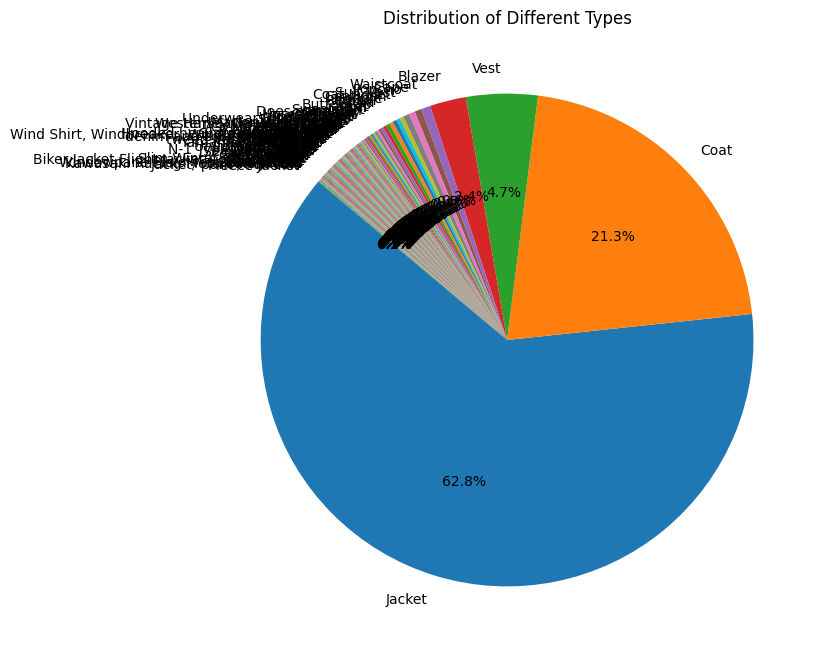

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(type_percentage['Percentage'], labels=type_percentage['Type'], autopct='%1.1f%%', startangle=140)
ax.set_title('Distribution of Different Types')

# Show the plot
plt.show()

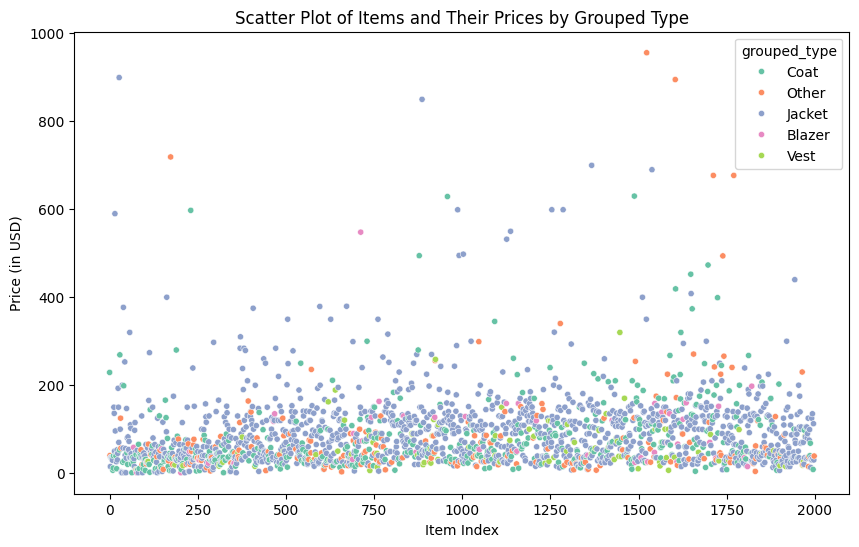

In [41]:
# Ensure the DataFrame has 'price' column as a numerical value if not already done
df['price'] = df['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Create the scatter plot with different colors based on 'grouped_type'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='price', hue='grouped_type', palette='Set2', s=20)

# Set the labels and title
plt.xlabel('Item Index')
plt.ylabel('Price (in USD)')
plt.title('Scatter Plot of Items and Their Prices by Grouped Type')

# Show the plot
plt.show()



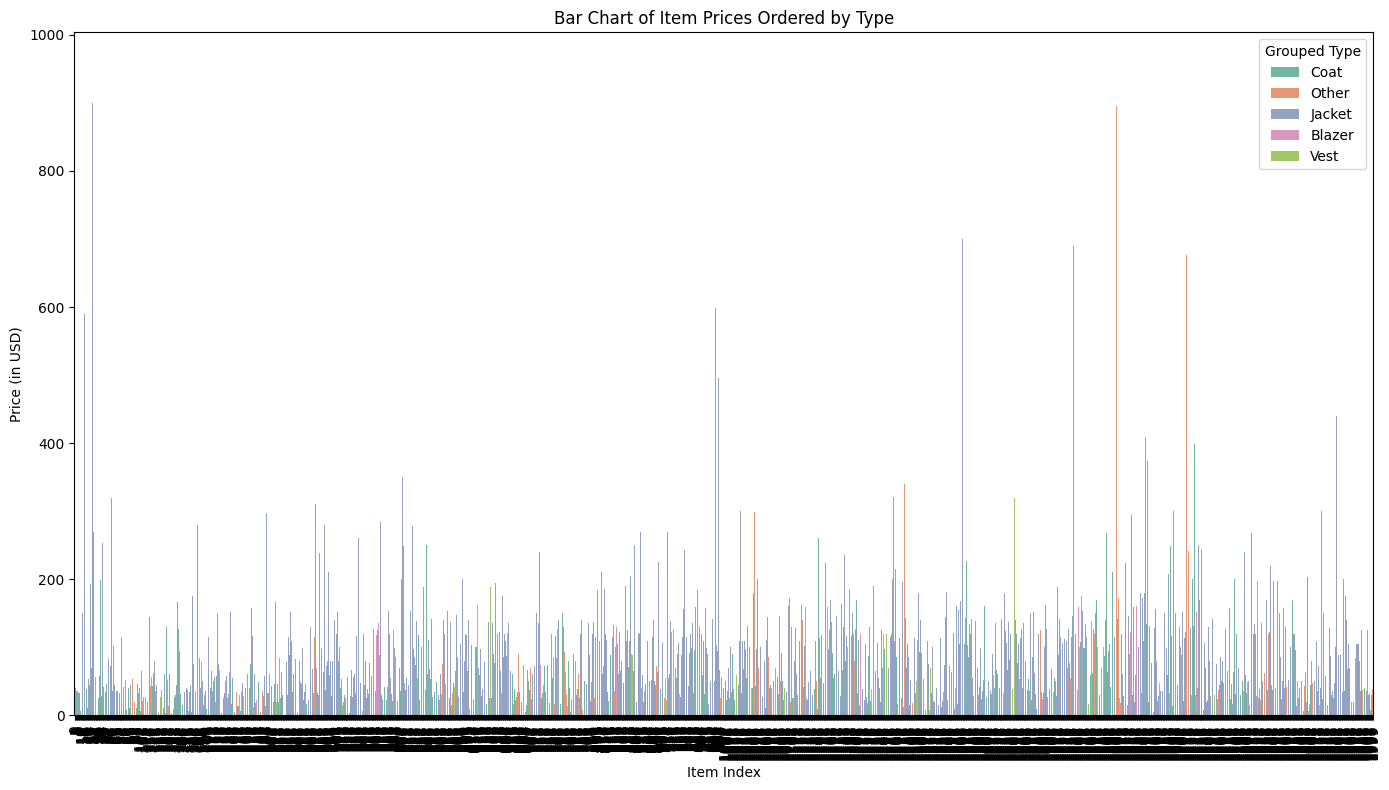

In [42]:
df['price'] = df['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Sort the DataFrame by 'grouped_type' first
df_sorted = df.sort_values(by='grouped_type')

# Create the bar chart
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=df_sorted.index, y=df_sorted['price'], hue=df_sorted['grouped_type'], dodge=False, palette='Set2')

# Set the labels and title
plt.xlabel('Item Index')
plt.ylabel('Price (in USD)')
plt.title('Bar Chart of Item Prices Ordered by Type')
plt.legend(title='Grouped Type', loc='upper right')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

<h1> Data Preprocessing

In [43]:
df.isnull().sum()


title                   1
type                   19
priceWithCurrency       1
lastUpdated           317
availableText         190
itemLocation         1508
grouped_type            0
price                   1
dtype: int64

In [44]:
# Convert 'lastUpdated' to datetime
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'], errors='coerce')

# Extract price from 'priceWithCurrency'
df['price'] = df['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Display the first few rows after preprocessing
df.head()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,title,type,priceWithCurrency,lastUpdated,availableText,itemLocation,grouped_type,price
0,XIYUER Women's down jacket Short 90% duck down...,Coat,US $229.00,2024-10-16 09:26:58,10 available,NaN,Coat,229.00
1,Reebok Men's Softshell Jacket,NaN,US $40.00,NaT,5 available,"Hurst, Texas, United States",Other,40.00
2,Mens Fleece Jacket Soft Plush Zip Up Fall Wint...,Jacket,US $14.99/ea,2024-10-16 12:16:32,4 available,"Alviso, California, United States",Jacket,14.99
3,Men's Casual Padded Jacket Winter Warm Hooded ...,Jacket,US $35.83/ea,2024-10-17 18:11:06,3 available30 sold,NaN,Jacket,35.83
4,Men's Casual Padded Jacket Winter Warm Hooded ...,Jacket,US $35.83,NaT,Last one8 sold,NaN,Jacket,35.83


In [45]:
# Extract available and sold data from availableText column
df['available'] = df['availableText'].str.extract(r'(\d+)\s*available').astype(float)
df['sold'] = df['availableText'].str.extract(r'(\d+)\s*sold').astype(float)

# Display first few rows of new columns
print("\nNew columns with available and sold data:")
print(df[['availableText', 'available', 'sold']].head())

# Check null values in new columns
print("\nNull values in new columns:")
print(df[['available', 'sold']].isnull().sum())


New columns with available and sold data:
        availableText  available  sold
0        10 available       10.0   NaN
1         5 available        5.0   NaN
2         4 available        4.0   NaN
3  3 available30 sold        3.0  30.0
4      Last one8 sold        NaN   8.0

Null values in new columns:
available    1134
sold          352
dtype: int64


In [46]:
# Define the main types we're interested in
main_types = ['Jacket', 'Coat', 'Blazer', 'Vest']

# Create a new column 'grouped_type' to categorize items
df['grouped_type'] = df['type'].apply(lambda x: x if x in main_types else 'Other')

# Ensure 'price' is a numerical column if not already done
df['price'] = df['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Sort the DataFrame by 'grouped_type' and 'price'
df_sorted = df.sort_values(by=['grouped_type', 'price'])

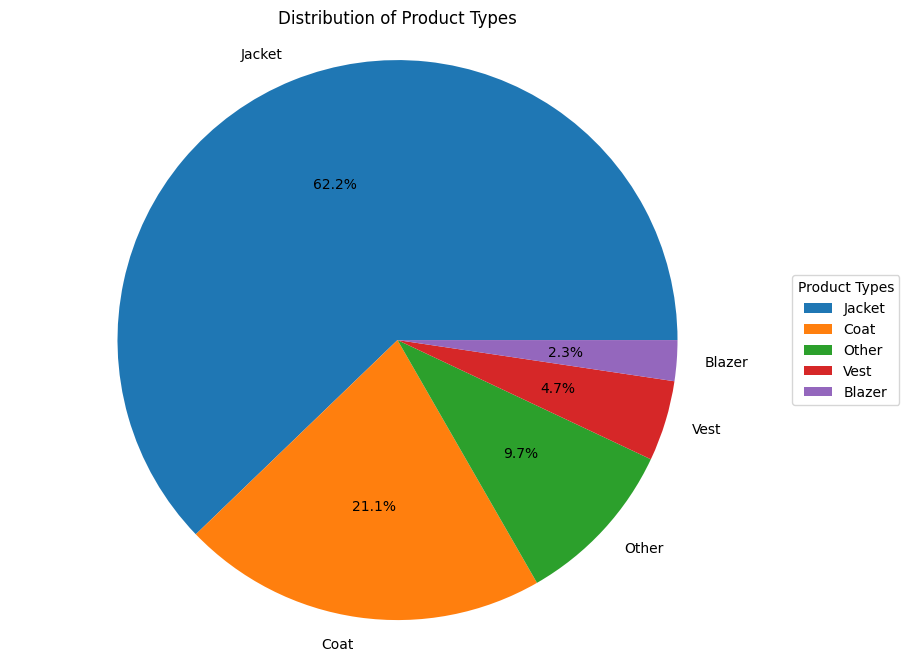

In [47]:
# Calculate counts for each grouped type
type_counts = df['grouped_type'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Product Types')

# Add legend
plt.legend(title='Product Types', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure pie chart is circular
plt.axis('equal')

# Show plot
plt.show()



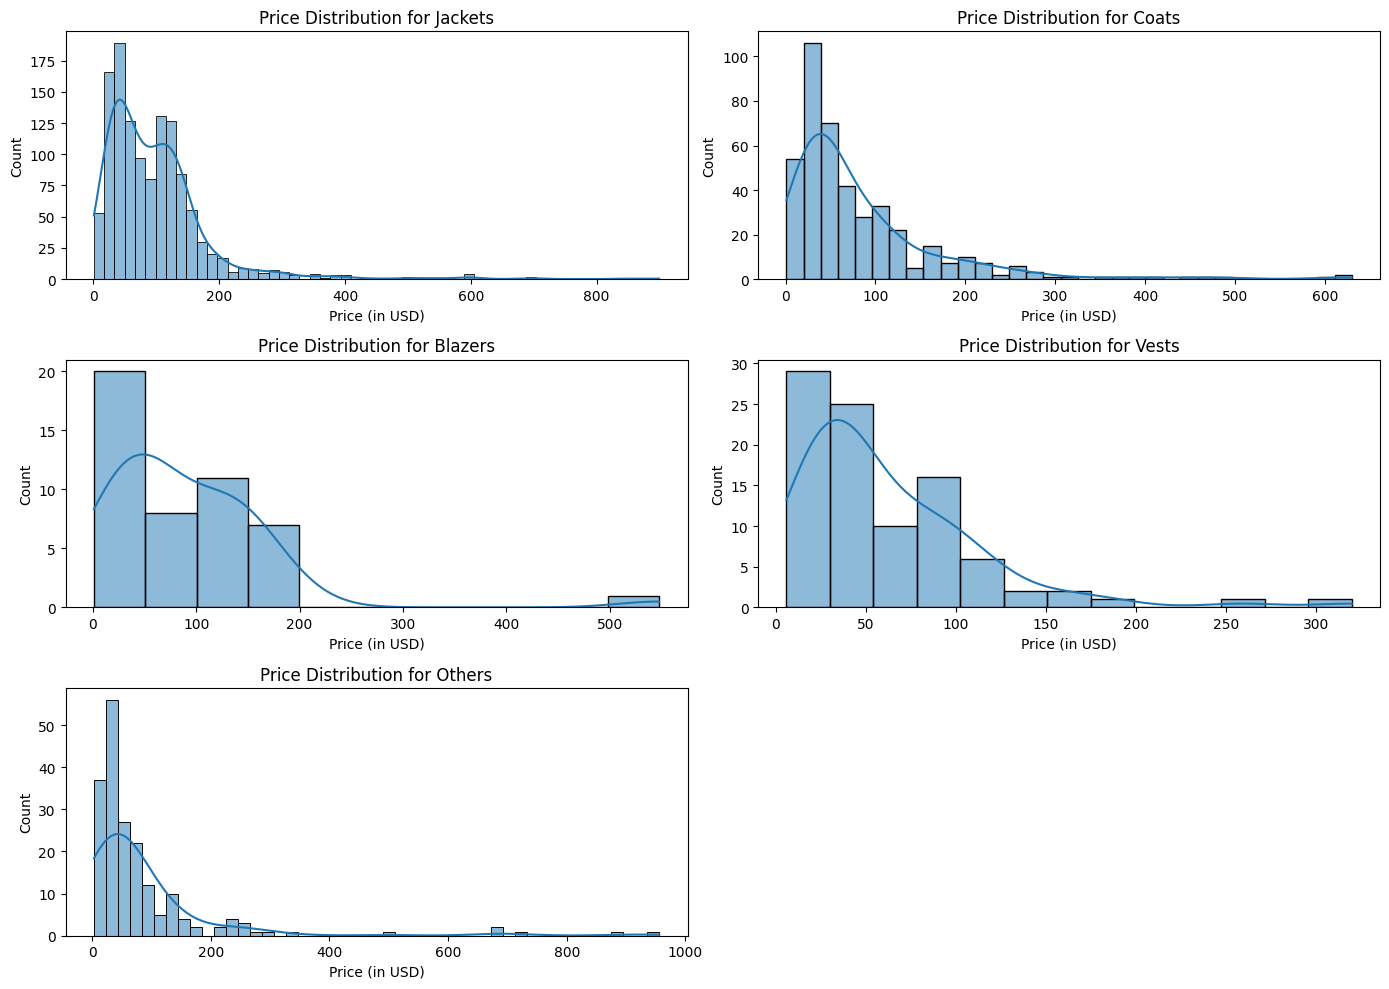

In [48]:
main_types = ['Jacket', 'Coat', 'Blazer', 'Vest', 'Other']
# Create a histogram for each type
plt.figure(figsize=(14, 10))

for i, item_type in enumerate(main_types, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[df['grouped_type'] == item_type]['price'], kde=True)
    plt.title(f'Price Distribution for {item_type}s')
    plt.xlabel('Price (in USD)')
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()


In [49]:
# Ensure 'price' is a numerical column if not already done
df['price'] = df['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Find the item with the highest price
most_expensive_item = df.loc[df['price'].idxmax()]

print("The item with the highest price is:")
print(most_expensive_item)

The item with the highest price is:
title                Goose Arctic Bay Canada Antarctica Down Extrem...
type                                                              DOWN
priceWithCurrency                                           US $956.00
lastUpdated                                                        NaT
availableText                                                      NaN
itemLocation                                                       NaN
grouped_type                                                     Other
price                                                            956.0
available                                                          NaN
sold                                                               NaN
Name: 1523, dtype: object


In [50]:
# Ensure 'price' is a numerical column if not already done
df['price'] = df['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Calculate max, min, and mean price for each grouped type
grouped_stats = df.groupby('grouped_type')['price'].agg(['max', 'min', 'mean']).reset_index()

# Display the result
print(grouped_stats)


  grouped_type     max   min       mean
0       Blazer  548.00  0.95  90.553830
1         Coat  630.00  0.99  82.840474
2       Jacket  899.55  0.95  96.700032
3        Other  956.00  3.00  87.245130
4         Vest  320.00  6.01  62.493871


<h1> Correlation Analysis

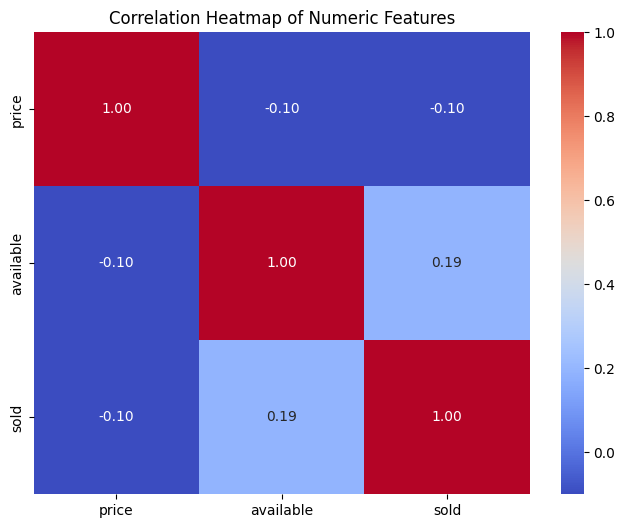

In [51]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_df
# # Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

There are direct correlation can show in this dataset it might because there aren't enough numberic data being provided in the dataset.


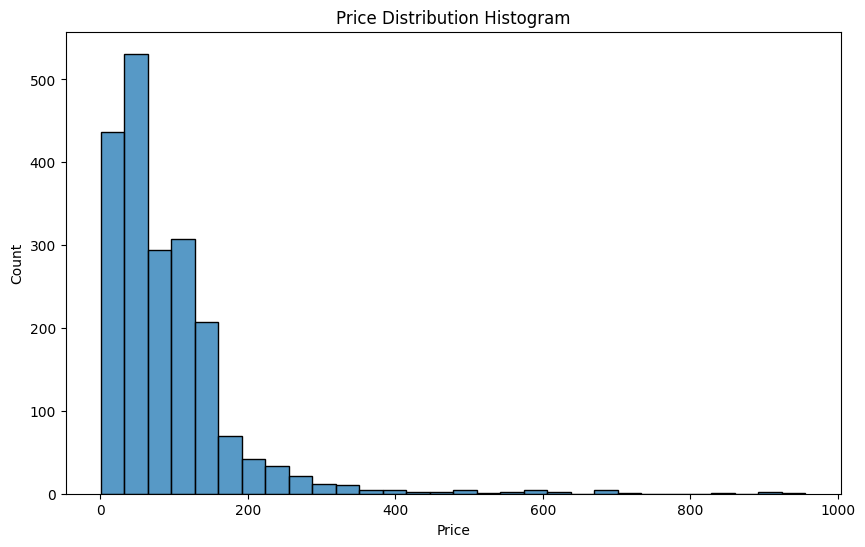

In [52]:
# Analyze price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30)
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


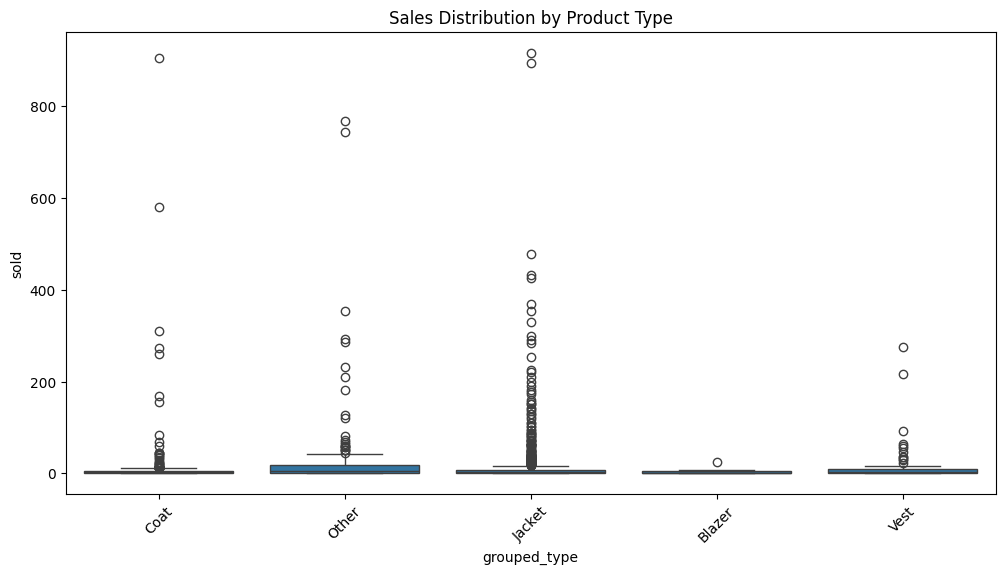

In [53]:
# Analyze sales comparison between different product types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='grouped_type', y='sold')
plt.title('Sales Distribution by Product Type')
plt.xticks(rotation=45)
plt.show()

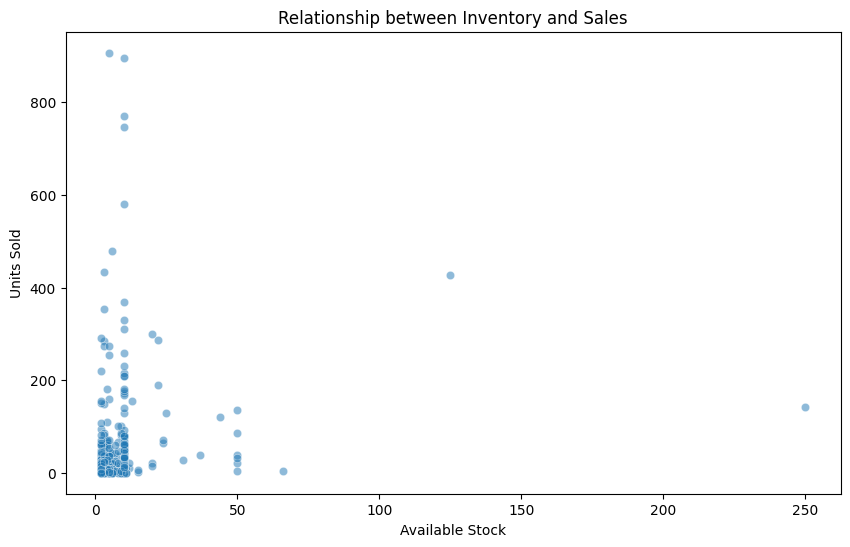

In [54]:
# Analyze relationship between inventory and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='available', y='sold', alpha=0.5)
plt.title('Relationship between Inventory and Sales')
plt.xlabel('Available Stock')
plt.ylabel('Units Sold')
plt.show()

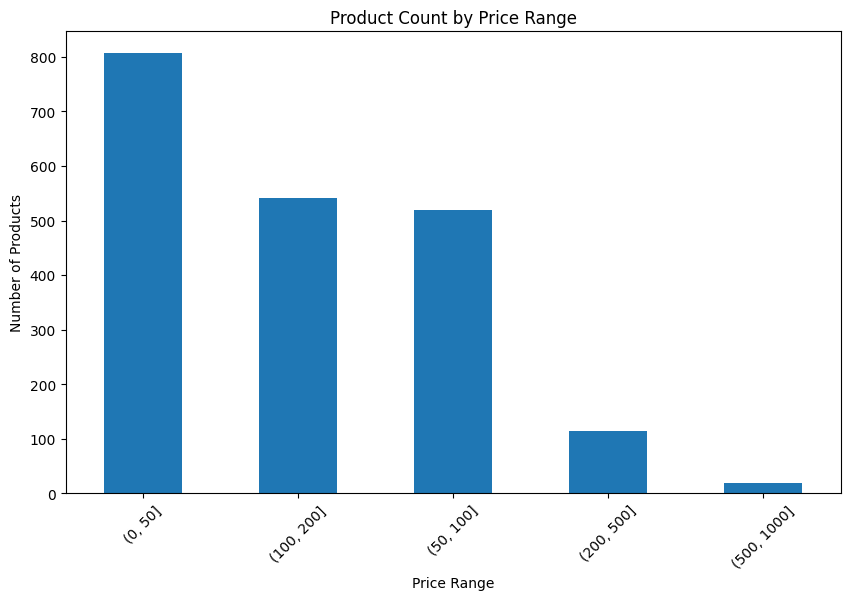

In [55]:
# Analyze product count in different price ranges
price_bins = [0, 50, 100, 200, 500, 1000]
df['price_range'] = pd.cut(df['price'], bins=price_bins)
plt.figure(figsize=(10, 6))
df['price_range'].value_counts().plot(kind='bar')
plt.title('Product Count by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

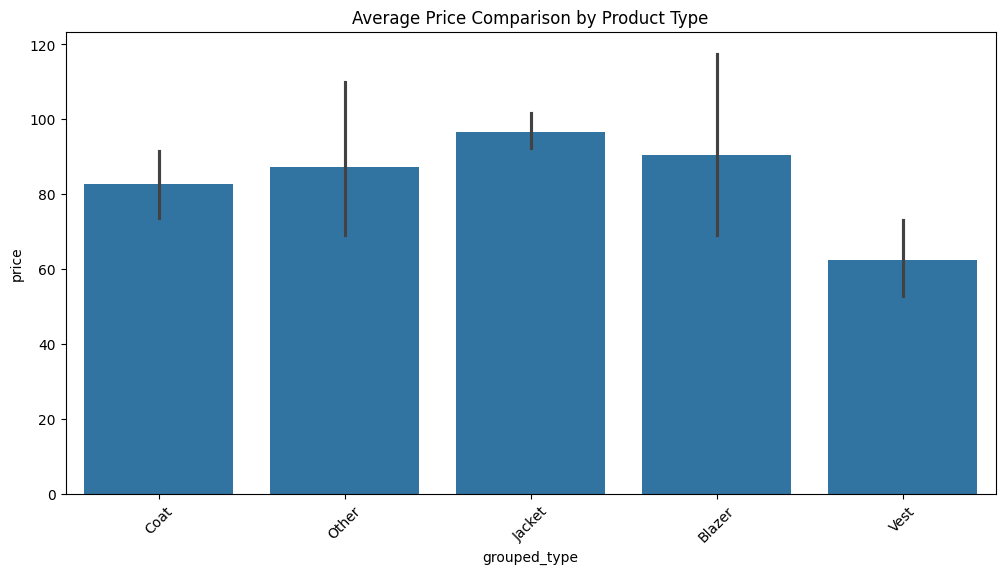

In [56]:
# Analyze average price by product type
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='grouped_type', y='price')
plt.title('Average Price Comparison by Product Type')
plt.xticks(rotation=45)
plt.show()



<h1> Conclusion

# Conclusion:

Based on the analysis of the winter jacket sales data, we found several key insights:

1. Product Types: The dataset shows a diverse range of winter jackets, with distinct categories like jackets, coats, and parkas. Each type has different pricing and sales patterns.

2. Pricing Strategy: Most products fall within the $35-120 price range, with some premium items reaching up to $956. The average price is around $91.

3. Sales Performance: The average number of units sold is 16, with significant variation (some products selling just 1 unit while others sold up to 917 units).

4. Inventory Management: Available stock ranges from 2 to 250 units, with a median of 3 units, suggesting most sellers maintain a very low inventory levels.

Limitations and Future Improvements:
- The dataset lacks temporal data to analyze seasonal trends
- Price fluctuations over time are not captured 
- Better separation of available and sold inventory data would be beneficial
- Additional customer demographics and geographical data could provide deeper insights
